In [148]:
path="/Users/ruimaciel/Desktop/Barcelona/Machine Learning/predicting-apartment-prices-in-barcelona-2023/train.csv"

import pandas as pd
import statistics
import numpy as np  
df=pd.read_csv(path)

In [149]:
"""Function to give missing information overall"""
def calculate_missing_info(df):
    def calculate_percentage_with_missing(df, num_missing):
        total_rows = len(df)
        rows_with_missing = (df.isnull().sum(axis=1) == num_missing).sum()
        percentage_missing = (rows_with_missing / total_rows) * 100
        return rows_with_missing, percentage_missing

    total_rows = len(df)
    total_columns = df.shape[1]

    # Calculate the percentage of missing values in each column
    percentage_missing = (df.isnull().mean() * 100).round(2)

    missing_info = {
        "total_rows": total_rows,
        "total_columns": total_columns,
        "column_missing_percentages": percentage_missing
    }

    for num_missing in range(0, 5):
        rows_with_missing, percentage_missing = calculate_percentage_with_missing(df, num_missing)
        missing_info[f"rows_with_{num_missing}_missing"] = rows_with_missing
        missing_info[f"percentage_{num_missing}_missing"] = percentage_missing

    return missing_info

calculate_missing_info(df)

{'total_rows': 8000,
 'total_columns': 15,
 'column_missing_percentages': id                   0.00
 num_rooms            0.00
 num_baths            2.00
 square_meters        1.94
 orientation         29.26
 year_built           2.12
 door                 1.86
 is_furnished         2.06
 has_pool             1.95
 neighborhood         2.06
 num_crimes           2.00
 has_ac               2.11
 accepts_pets         1.94
 num_supermarkets    82.36
 price                0.00
 dtype: float64,
 'rows_with_0_missing': 813,
 'percentage_0_missing': 10.1625,
 'rows_with_1_missing': 4322,
 'percentage_1_missing': 54.025,
 'rows_with_2_missing': 2422,
 'percentage_2_missing': 30.275000000000002,
 'rows_with_3_missing': 407,
 'percentage_3_missing': 5.0874999999999995,
 'rows_with_4_missing': 33,
 'percentage_4_missing': 0.41250000000000003}

In [150]:
"""function to give you the statistics of the columns"""

def calculate_column_statistics(df):
    # Filter columns with numeric (int or float) data types
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns

    # Get all column names
    all_columns = df.columns
    total_columns = len(all_columns)

    num_numeric_columns = len(numeric_columns)

    # Find columns with categorical values
    categorical_columns = [col for col in all_columns if df[col].dtype == 'object']

    print(f"Total number of columns: {total_columns}")
    print(f"Number of numeric columns (int or float): {num_numeric_columns}")
    print("Columns with categorical values:")
    for column in categorical_columns:
        print(column)

    # Create a dictionary to store statistics
    stats_dict = {
        'Variable': numeric_columns,
        'Mean': [],
        'Mode': [],
        'Median': [],
        'Standard Deviation': [],
        'Minimum': [],
        'Maximum': [],
        'Count': [],
        'IQR': [],
        'Skewness': [],
        'Range': []
    }

    for column in numeric_columns:
        mean = df[column].mean()
        mode = statistics.mode(df[column].dropna())  # Handle potential multiple modes
        median = df[column].median()
        std_dev = df[column].std()
        min_val = df[column].min()
        max_val = df[column].max()
        count = df[column].count()
        iqr = np.percentile(df[column].dropna(), 75) - np.percentile(df[column].dropna(), 25)
        skew = df[column].skew()
        column_range = max_val - min_val

        stats_dict['Mean'].append(mean)
        stats_dict['Mode'].append(mode)
        stats_dict['Median'].append(median)
        stats_dict['Standard Deviation'].append(std_dev)
        stats_dict['Minimum'].append(min_val)
        stats_dict['Maximum'].append(max_val)
        stats_dict['Count'].append(count)
        stats_dict['IQR'].append(iqr)
        stats_dict['Skewness'].append(skew)
        stats_dict['Range'].append(column_range)

    # Create a DataFrame from the dictionary
    stats_df = pd.DataFrame(stats_dict)

    return stats_df

calculate_column_statistics(df)

Total number of columns: 15
Number of numeric columns (int or float): 8
Columns with categorical values:
orientation
door
is_furnished
has_pool
neighborhood
has_ac
accepts_pets


,Variable,Mean,Mode,Median,Standard Deviation,Minimum,Maximum,Count,IQR,Skewness,Range
0,id,5012.506875,9255.0,5014.5,2887.649416,2.0,10000.0,8000,4992.50,0.002263,9998.0
1,num_rooms,2.868500,1.0,2.0,5.300469,1.0,97.0,8000,3.00,13.500785,96.0
2,num_baths,1.988265,1.0,2.0,0.815943,1.0,3.0,7840,2.00,0.021549,2.0
3,square_meters,108.031995,123.0,110.0,38.671420,-100.0,170.0,7845,62.00,-0.735358,270.0
4,year_built,1985.321073,1995.0,1985.0,20.591437,1950.0,2021.0,7830,35.00,0.012313,71.0
5,num_crimes,2.803444,0.0,1.0,3.447714,0.0,10.0,7840,6.00,0.841381,10.0
6,num_supermarkets,1.982991,2.0,2.0,0.803182,1.0,3.0,1411,2.00,0.030734,2.0
7,price,1099.616250,1129.0,1104.0,271.686617,195.0,2095.0,8000,389.25,-0.031477,1900.0


In [151]:
import datetime
"""Function to create variable age from variable year built"""

def calculate_and_add_age_column(df, current_year=None):
    # If current_year is not provided, use the current calendar year
    if current_year is None:
        current_year = datetime.datetime.now().year

    # Calculate the 'age' column by subtracting 'year_built' from the current year
    df['age'] = current_year - df['year_built']
    
    # Remove the 'year_built' column
    df = df.drop(columns='year_built')

    return df



In [152]:
def convert_boolean_to_dummies_inplace(df, columns):
    for column in columns:
        try:
            df[column] = df[column].apply(lambda x: 1 if x == True else (0 if x == False else x))
        except ValueError:
            pass

columns_to_convert = ['is_furnished', 'has_pool', 'has_ac', 'accepts_pets']

convert_boolean_to_dummies_inplace(df, columns_to_convert)
calculate_column_statistics(df)

Total number of columns: 15
Number of numeric columns (int or float): 12
Columns with categorical values:
orientation
door
neighborhood


,Variable,Mean,Mode,Median,Standard Deviation,Minimum,Maximum,Count,IQR,Skewness,Range
0,id,5012.506875,9255.0,5014.5,2887.649416,2.0,10000.0,8000,4992.50,0.002263,9998.0
1,num_rooms,2.868500,1.0,2.0,5.300469,1.0,97.0,8000,3.00,13.500785,96.0
2,num_baths,1.988265,1.0,2.0,0.815943,1.0,3.0,7840,2.00,0.021549,2.0
3,square_meters,108.031995,123.0,110.0,38.671420,-100.0,170.0,7845,62.00,-0.735358,270.0
4,year_built,1985.321073,1995.0,1985.0,20.591437,1950.0,2021.0,7830,35.00,0.012313,71.0
5,is_furnished,0.481685,0.0,0.0,0.499696,0.0,1.0,7835,1.00,0.073324,1.0
6,has_pool,0.504207,1.0,1.0,0.500014,0.0,1.0,7844,1.00,-0.016832,1.0
7,num_crimes,2.803444,0.0,1.0,3.447714,0.0,10.0,7840,6.00,0.841381,10.0
8,has_ac,0.504406,1.0,1.0,0.500013,0.0,1.0,7831,1.00,-0.017626,1.0
9,accepts_pets,0.507967,1.0,1.0,0.499968,0.0,1.0,7845,1.00,-0.031878,1.0


81
7845
1.0325047801147227


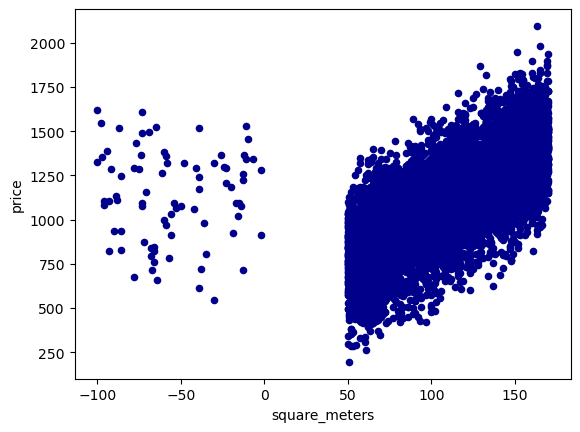

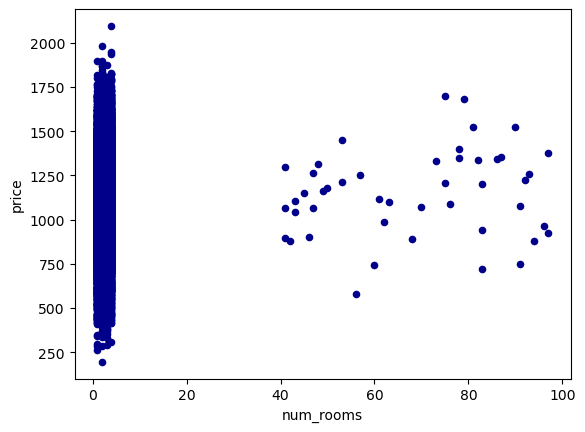

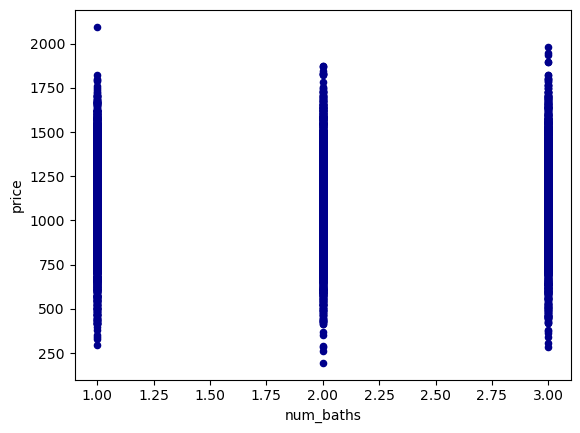

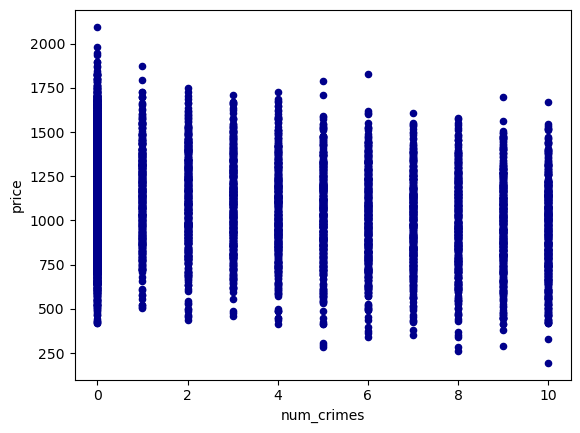

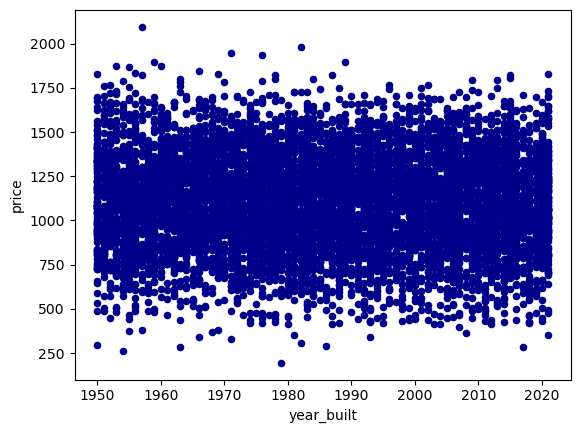

In [154]:
#checking the variable square_meters
negative_elements = (df["square_meters"] < 0).sum().sum()
total_elements = df["square_meters"].count().sum()
percentage_negative = (negative_elements / total_elements) * 100
print(negative_elements)
print(total_elements)
print(percentage_negative)

numerical_columns = df.select_dtypes(include=['int', 'float'])

numerical_columns.describe()

#you have negative square meters, which is not possible, I would just turn them positive.

ax1 = df.plot.scatter(x='square_meters',
                      y='price',
                      c='DarkBlue')

ax1 = df.plot.scatter(x='num_rooms',
                      y='price',
                      c='DarkBlue')

ax1 = df.plot.scatter(x='num_baths',
                      y='price',
                      c='DarkBlue')

ax1 = df.plot.scatter(x='num_crimes',
                      y='price',
                      c='DarkBlue')

ax1 = df.plot.scatter(x='year_built',
                      y='price',
                      c='DarkBlue')

In [155]:
from sklearn.impute import KNNImputer


def impute_num_baths_and_num_crimes(df):
    n_neighbors = 5  # You can adjust the number of neighbors if needed
    knn_imputer = KNNImputer(n_neighbors=n_neighbors, weights='uniform')
    df[['num_baths', 'num_crimes']] = knn_imputer.fit_transform(df[['num_baths', 'num_crimes']])
    return df

df = impute_num_baths_and_num_crimes(df)


column_list = df.columns.tolist()
print(column_list)

['id', 'num_rooms', 'num_baths', 'square_meters', 'orientation', 'year_built', 'door', 'is_furnished', 'has_pool', 'neighborhood', 'num_crimes', 'has_ac', 'accepts_pets', 'num_supermarkets', 'price']


In [156]:
selected_columns = ['id', 'num_rooms', 'num_baths', 'square_meters', 'year_built', 'is_furnished', 'has_pool', 'neighborhood', 'num_crimes', 'has_ac', 'accepts_pets', 'price']

# Create a new DataFrame with the selected columns
new_df = df[selected_columns]

def clean_dataframe(df):
    # Turn negative square meter values into positive
    df['square_meters'] = df['square_meters'].abs()
    
    # Eliminate rows with less than 50 square meters
    df = df[df['square_meters'] >= 50]
    
    # Eliminate rows with more than 10 rooms
    df = df[df['num_rooms'] <= 10]

    return df


def filter_within_0_5_99_5_quantiles(df):
    q0_5 = df['price'].quantile(0.005)
    q99_5 = df['price'].quantile(0.995)
    filtered_df = df[(df['price'] >= q0_5) & (df['price'] <= q99_5)]
    return filtered_df

new_df=clean_dataframe(new_df)
new_df=filter_within_0_5_99_5_quantiles(new_df)

calculate_column_statistics(new_df)

Total number of columns: 12
Number of numeric columns (int or float): 11
Columns with categorical values:
neighborhood


/var/folders/n4/wdz2gxc13wl6m46by5g242kh0000gn/T/ipykernel_7380/1345011555.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['square_meters'] = df['square_meters'].abs()


,Variable,Mean,Mode,Median,Standard Deviation,Minimum,Maximum,Count,IQR,Skewness,Range
0,id,4994.170633,1562.0,4982.0,2885.678499,2.0,10000.0,7689,4989.0,0.011039,9998.0
1,num_rooms,2.488750,1.0,2.0,1.122404,1.0,4.0,7689,2.0,0.014838,3.0
2,num_baths,1.988006,1.0,2.0,0.808878,1.0,3.0,7689,2.0,0.024689,2.0
3,square_meters,109.447783,123.0,110.0,34.820431,50.0,170.0,7689,61.0,0.007262,120.0
4,year_built,1985.366184,1995.0,1985.0,20.573116,1950.0,2021.0,7529,35.0,0.008583,71.0
5,is_furnished,0.483395,0.0,0.0,0.499757,0.0,1.0,7528,1.0,0.066469,1.0
6,has_pool,0.504709,1.0,1.0,0.500011,0.0,1.0,7539,1.0,-0.018840,1.0
7,num_crimes,2.801692,0.0,1.0,3.417518,0.0,10.0,7689,5.6,0.844026,10.0
8,has_ac,0.505910,1.0,1.0,0.499998,0.0,1.0,7529,1.0,-0.023648,1.0
9,accepts_pets,0.505903,1.0,1.0,0.499998,0.0,1.0,7539,1.0,-0.023617,1.0


In [157]:
# Eliminate rows with more than 1 missing values
new_df = new_df.dropna()

calculate_column_statistics(new_df)

Total number of columns: 12
Number of numeric columns (int or float): 11
Columns with categorical values:
neighborhood


,Variable,Mean,Mode,Median,Standard Deviation,Minimum,Maximum,Count,IQR,Skewness,Range
0,id,4988.592167,1562.0,4976.0,2883.908005,2.0,10000.0,6792,4972.75,0.011508,9998.0
1,num_rooms,2.485277,1.0,2.0,1.123013,1.0,4.0,6792,2.00,0.019273,3.0
2,num_baths,1.981359,1.0,2.0,0.809318,1.0,3.0,6792,2.00,0.036702,2.0
3,square_meters,109.390018,123.0,110.0,34.755294,50.0,170.0,6792,60.00,0.011212,120.0
4,year_built,1985.299617,1972.0,1985.0,20.640129,1950.0,2021.0,6792,35.00,0.013864,71.0
5,is_furnished,0.486896,0.0,0.0,0.499865,0.0,1.0,6792,1.00,0.052444,1.0
6,has_pool,0.502945,1.0,1.0,0.500028,0.0,1.0,6792,1.00,-0.011781,1.0
7,num_crimes,2.788781,0.0,1.0,3.411476,0.0,10.0,6792,5.60,0.855444,10.0
8,has_ac,0.510012,1.0,1.0,0.499937,0.0,1.0,6792,1.00,-0.040064,1.0
9,accepts_pets,0.505300,1.0,1.0,0.500009,0.0,1.0,6792,1.00,-0.021207,1.0


In [158]:
"""creates a function to add the neighborhood dummies to the dataframe"""

def create_and_append_neighborhood_columns(df):
    # Create binary columns for each neighborhood
    neighborhood_dummies = pd.get_dummies(df['neighborhood'])

    # Convert boolean values to 1 (True) or 0 (False)
    neighborhood_dummies = neighborhood_dummies.applymap(lambda x: 1 if x else 0)

    # Concatenate the new DataFrame with the original one
    result_df = pd.concat([df, neighborhood_dummies], axis=1)

    result_df = result_df.drop(columns=['neighborhood', "id"])
    return result_df

with_dummies_df = create_and_append_neighborhood_columns(new_df)

In [159]:
import statsmodels.api as sm

def ols_regression_summary(data):
    # Define the target variable and features
    X = data.drop(['price'], axis=1)
    y = data['price']

    # Add a constant (intercept) to the features
    X = sm.add_constant(X)

    # Create and fit the OLS regression model
    model = sm.OLS(y, X).fit()

    # Get the summary of regression results
    summary = model.summary()

    return summary

ols_regression_summary(with_dummies_df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     534.6
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:16:45   Log-Likelihood:                -44478.
No. Observations:                6792   AIC:                         8.899e+04
Df Residuals:                    6773   BIC:                         8.912e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 509.8419    180.153      2.830      0.005     156.686     862.997
num_rooms              13.9437      1.830      7.621      0.000      10.357      17.531
num_baths              11.0006      2.540      4.330      0.000       6.021      15.980
square_meters           5.3894      0.059     91.062      0.000       5.273       5.505
year_built             -0.0274      0.100     -0.275      0.783      -0.223       0.168
is_furnished            1.3680      4.113      0.333      0.739      -6.694       9.430
has_pool                5.7179      4.114      1.390      0.165      -2.346      13.782
num_crimes            -20.7860      0.658    -31.574      0.000     -22.076     -19.495
has_ac                  4.5304      4.113      1.102      0.271      -3.532      12.593
accepts_pets           -3.7556      4.111     -0.913      0.361     -11.815       4.304
Ciutat Vella           49.0777     19.109      2.568      0.010      11.617      86.538
Eixample               52.3107     19.164      2.730      0.006      14.743      89.878
Gràcia                 55.9559     19.008      2.944      0.003      18.695      93.217
Horta                  55.3848     18.906      2.929      0.003      18.323      92.447
Les Cors               54.4031     19.155      2.840      0.005      16.853      91.953
Nou Barris             49.9207     19.069      2.618      0.009      12.540      87.302
Sant Andreu            47.2560     19.032      2.483      0.013       9.947      84.564
Sant Martí             44.0798     19.097      2.308      0.021       6.645      81.515
Sants                  46.4790     18.989      2.448      0.014       9.256      83.702
Sarrià-Sant Gervasi    54.9741     19.096      2.879      0.004      17.540      92.408
==============================================================================
Omnibus:                        0.002   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.005
Skew:                           0.001   Prob(JB):                        0.997
Kurtosis:                       2.997   Cond. No.                     3.71e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [163]:
def quartile_regression_summary(data):
    # Define the target variable and features
    X = data.drop('price', axis=1)
    y = data['price']

    # Create and fit the quartile regression model
    mod = sm.QuantReg(y, X)

    # Fit the model for different quantiles (e.g., 0.25, 0.5, 0.75)
    quantiles = [0.25, 0.5, 0.75]
    results = []
    for q in quantiles:
        res = mod.fit(q=q)
        results.append(res)

    # Display summaries for each quantile
    for i, q in enumerate(quantiles):
        print(f"Quantile {q}:")
        print(results[i].summary())

quartile_regression_summary(with_dummies_df)

columns = with_dummies_df.columns
print(columns)

/Users/ruimaciel/anaconda3/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/Users/ruimaciel/anaconda3/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Quantile 0.25:
                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3689
Model:                       QuantReg   Bandwidth:                       37.90
Method:                 Least Squares   Sparsity:                        499.6
Date:                Sat, 21 Oct 2023   No. Observations:                 6792
Time:                        17:49:57   Df Residuals:                     6773
                                        Df Model:                           18
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
num_rooms              13.1778      2.333      5.649      0.000       8.605      17.751
num_baths              14.3250      3.219      4.451      0.000       8.016      20.634
square_meters           5.4507      0.075     72.380      0.000       5.303     

/Users/ruimaciel/anaconda3/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


In [162]:
import pandas as pd
import statsmodels.api as sm

# Load training and test datasets
train_data = with_dummies_df
test_data = pd.read_csv("/Users/ruimaciel/Desktop/Barcelona/Machine Learning/predicting-apartment-prices-in-barcelona-2023/test.csv")

# Define your features (independent variables) and target (dependent variable)
X_train = train_data['id', 'num_rooms', 'num_baths', 'square_meters', 'year_built', 'is_furnished', 'has_pool', 'neighborhood', 'num_crimes', 'has_ac', 'accepts_pets']
X_test = test_data['id', 'num_rooms', 'num_baths', 'square_meters', 'year_built', 'is_furnished', 'has_pool', 'neighborhood', 'num_crimes', 'has_ac', 'accepts_pets']
y_train = train_data['price']
y_test = test_data['price']

# Define the quantile levels for the four quartiles
quantile_levels = [0.25, 0.5, 0.75, 1.0]

# Perform quantile regression for each quartile and append predictions
results = {}
for quantile in quantile_levels:
    model_fit = sm.QuantReg(train_data['price'], sm.add_constant(X_train)).fit(q=quantile)
    results[quantile] = model_fit.predict(sm.add_constant(X_test))

# Add quartile-specific predictions to the test dataset
test_data = pd.concat([test_data, pd.DataFrame(results)], axis=1)

# Save the 'id' and quartile-specific predictions to a CSV file
test_data[['id'] + quantile_levels].to_csv("/Users/ruimaciel/Desktop/Barcelona/Machine Learning/predicting-apartment-prices-in-barcelona-2023/submissions.csv", index=False)

KeyError: ('id', 'num_rooms', 'num_baths', 'square_meters', 'year_built', 'is_furnished', 'has_pool', 'neighborhood', 'num_crimes', 'has_ac', 'accepts_pets')